### Image Resize: file version

In [39]:
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Replace 'input_image.jpg' and 'resized_output_image.jpg' with your file paths
input_image_path = 'testimage.jpg'
output_image_path = 'resized_output_image.jpg'

# default size is 256 by 256 pixels, resized to 100 x 100 px
resize_image(input_image_path, output_image_path, new_width=100)  # Adjust the new width as needed


Image resized and saved to resized_output_image.jpg


### Converting to Numpy and Displaying: file version

(100, 100, 3)


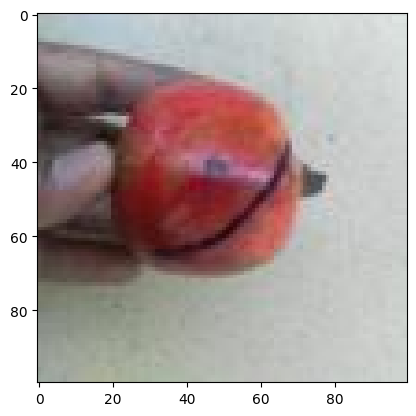

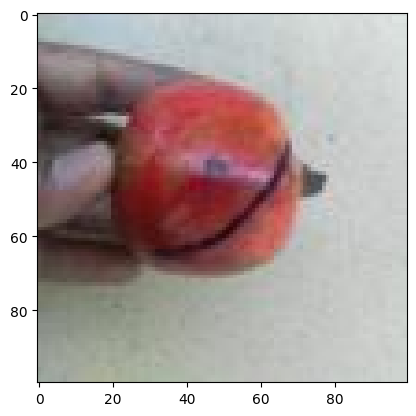

(100, 100, 3)


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('resized_output_image.jpg')

# Convert the image to a numpy array
pixels = np.array(image)
print(pixels.shape)

# Save the numpy array as a .npy file
np.save('output.npy', pixels)

# Display the image
plt.imshow(pixels)
plt.show()

data = np.load("output.npy")
plt.imshow(data)
plt.show()

print(data.shape)


### Image Resize: folder version

In [42]:
import os
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Define the input directory and output directory
input_dir = 'pomegranate_bad_subset'
output_dir = 'pbs_resize'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get all files in the directory
files = os.listdir(input_dir)

# Process each file
for filename in files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Define the input path and output path
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Resize the image
        resize_image(input_path, output_path, new_width=100)  # Adjust the new width as needed

Image resized and saved to pbs_resize\IMG_20190822_083956.jpg
Image resized and saved to pbs_resize\IMG_20190822_083957.jpg
Image resized and saved to pbs_resize\IMG_20190822_083958.jpg
Image resized and saved to pbs_resize\IMG_20190822_083958_1.jpg
Image resized and saved to pbs_resize\IMG_20190822_083959.jpg
Image resized and saved to pbs_resize\IMG_20190822_084000.jpg
Image resized and saved to pbs_resize\IMG_20190822_084001.jpg
Image resized and saved to pbs_resize\IMG_20190822_084002.jpg


### Converting to Numpy and Visualizing: folder version

(8, 100, 100, 3)
[[[176 182 182]
  [177 183 183]
  [179 184 187]
  ...
  [217 223 221]
  [216 222 220]
  [215 221 219]]

 [[176 185 184]
  [176 185 184]
  [176 184 186]
  ...
  [223 229 227]
  [223 229 227]
  [222 228 226]]

 [[177 189 187]
  [176 188 186]
  [173 187 187]
  ...
  [222 228 226]
  [221 227 225]
  [220 226 224]]

 ...

 [[148 158 149]
  [153 163 154]
  [157 167 158]
  ...
  [206 211 207]
  [206 211 207]
  [206 211 207]]

 [[152 162 153]
  [157 167 158]
  [158 168 159]
  ...
  [206 211 207]
  [206 211 207]
  [206 211 207]]

 [[155 165 156]
  [158 168 159]
  [158 168 159]
  ...
  [206 211 207]
  [206 211 207]
  [207 212 208]]]


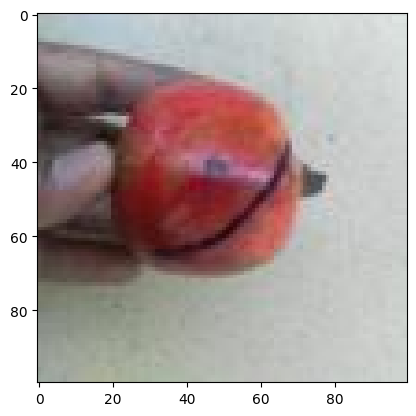

In [49]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the input directory
input_dir = 'pbs_resize'

# Get all files in the directory
files = os.listdir(input_dir)

# Initialize an empty list to store all image data
all_images = []

# Process each file
for filename in files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Define the input path
        input_path = os.path.join(input_dir, filename)

        # Load the image
        image = Image.open(input_path)

        # Convert the image to a numpy array
        pixels = np.array(image)

        # Add the image data to the list
        all_images.append(pixels)

# Convert the list of all image data to a numpy array
all_images_array = np.array(all_images)

# Save the numpy array as a .npy file
np.save('all_images.npy', all_images_array)

# Print the shape of the numpy array
print(all_images_array.shape)
print(all_images_array[0])
plt.imshow(all_images_array[0])

### Add labels to images: folder version

In [6]:
import pandas as pd
import numpy as np

# Example array of images (replace this with your array of images)
image1 = np.random.rand(32, 32, 3)  # Example image shape: 32x32x3 (height x width x channels)
image2 = np.random.rand(32, 32, 3)
image3 = np.random.rand(32, 32, 3)
images_array = np.array([image1, image2, image3])  # Array of images

# Example labels corresponding to the images
labels = np.array([0, 1, 0])  # Example labels (replace with your own labels)

# Combining images and labels
labeled_data = list(zip(images_array, labels))  # Combining images and labels using zip
# Accessing the labeled data
for image, label in labeled_data:
    # Here, 'image' is the image array and 'label' is its associated label
    print(f"Image Shape: {image.shape}, Label: {label}")

# Assuming images_array is your 4D numpy array of images and labels is your 1D numpy array of labels
df = pd.DataFrame({'Image': list(images_array), 'Label': labels})

# Now, each row in the DataFrame corresponds to an image and its label
print(df)


Image Shape: (32, 32, 3), Label: 0
Image Shape: (32, 32, 3), Label: 1
Image Shape: (32, 32, 3), Label: 0
                                               Image  Label
0  [[[0.857828458108126, 0.9932247802720248, 0.77...      0
1  [[[0.5515823839747896, 0.9318919246927905, 0.7...      1
2  [[[0.7792669112374614, 0.7578456057987654, 0.4...      0


In [7]:
#1d for fruit categories

## Pre-Alpha Testing

### Pre-Alpha Testing: Resizing the Images

In [8]:
import os
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Define the input directory and output directory
input_dir = 'FruitDataSet'
output_dir = 'FruitDataset_resize'

# Process each file
for dirpath, dirnames, filenames in os.walk(input_dir):
    for filename in filenames:
        # Check if the file is an image
        if filename.endswith('.jpg'):
            # Define the input path and output path
            input_path = os.path.join(dirpath, filename)
            relative_path = os.path.relpath(dirpath, input_dir)
            output_path_dir = os.path.join(output_dir, relative_path)

            # Create output directory if it doesn't exist
            os.makedirs(output_path_dir, exist_ok=True)

            output_path = os.path.join(output_path_dir, filename)

            # Resize the image
            resize_image(input_path, output_path, new_width=100)  # Adjust the new width as needed

Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115439.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115448.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115451.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115459.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115505.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115513.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115521.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115527.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115534.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115547.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115602.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\20190809_115606.jpg
Image resized and saved to FruitDataset_resize\Apple_Good\201908

### Convert Images to Numpy Arrays and Visualize

(6000, 100, 100, 3)
[[[0.86666667 0.90980392 0.98039216]
  [0.86666667 0.90980392 0.98039216]
  [0.86666667 0.91764706 0.99215686]
  ...
  [0.69411765 0.61568627 0.52156863]
  [0.72156863 0.64313725 0.54901961]
  [0.69019608 0.61176471 0.51764706]]

 [[0.86666667 0.90980392 0.98039216]
  [0.8627451  0.91372549 0.98039216]
  [0.86666667 0.91764706 0.99215686]
  ...
  [0.68627451 0.60784314 0.51372549]
  [0.7254902  0.64705882 0.55294118]
  [0.69019608 0.61176471 0.51764706]]

 [[0.86666667 0.91764706 0.98431373]
  [0.85882353 0.92156863 0.98431373]
  [0.85882353 0.91764706 0.99215686]
  ...
  [0.67843137 0.59215686 0.50196078]
  [0.73333333 0.65490196 0.56078431]
  [0.69019608 0.61176471 0.51764706]]

 ...

 [[0.12156863 0.14117647 0.15686275]
  [0.13333333 0.16470588 0.17647059]
  [0.20392157 0.23137255 0.2627451 ]
  ...
  [0.48235294 0.38039216 0.32156863]
  [0.4745098  0.37254902 0.31372549]
  [0.46666667 0.36470588 0.30588235]]

 [[0.14117647 0.16078431 0.17647059]
  [0.17647059 0.2

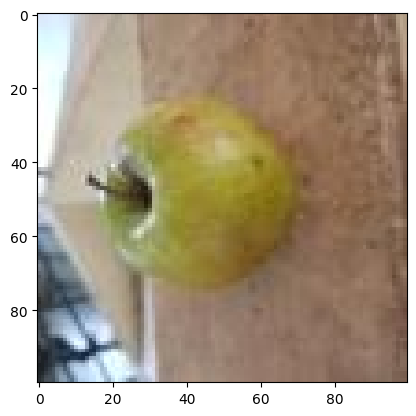

In [24]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the input directory
input_dir = 'FruitDataset_resize'

# Initialize an empty list to store all image data
all_images = []

# Process each file
for dirpath, dirnames, filenames in os.walk(input_dir):
    for filename in filenames:
        # Check if the file is an image
        if filename.endswith('.jpg'):
            # Define the input path
            input_path = os.path.join(dirpath, filename)

            # Load the image
            image = Image.open(input_path)

            # Convert the image to a numpy array
            pixels = np.array(image) / 255.0

            # Add the image data to the list
            all_images.append(pixels)

# Convert the list of all image data to a numpy array
all_images_array = np.array(all_images)

# Save the numpy array as a .npy file
np.save('dataset.npy', all_images_array)

# Print the shape of the numpy array
print(all_images_array.shape)
print(all_images_array[0])
plt.imshow(all_images_array[0])

### Convert to Pandas and Label It

In [3]:
import numpy as np
import pandas as pd

# Load the numpy array from the .npy file
data = np.load('dataset.npy', allow_pickle=True)

# Label each image
labels = np.arange(data.shape[0]) // 1000

# Create a DataFrame with the images and labels
df = pd.DataFrame({'Image': list(data), 'Label': labels})
first_image = df.iloc[0]['Image']

# print(df)
# Display the DataFrame
# print(df)
# Convert the DataFrame to a numpy array
data_labelled = df.to_numpy()

# Print the shape of the labelled data array
print(data_labelled.shape)

# Print the shape of the first image in the labelled data array
print(data_labelled[1][0].shape)

# Print the value of the first pixel of the first image in the labelled data array
print(data_labelled[1][0][0][0][0])

# Print the labels from the data_labelled array
print(data_labelled[:, 1])


# Save the numpy array to a .npy file
np.save('dataset_labelled.npy', data_labelled)

(6000, 2)
(100, 100, 3)
0.8941176470588236
[0 0 0 ... 5 5 5]


### Shuffling The Data and Splitting into Training and Testing

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Shuffle the data
df = shuffle(df, random_state=42)
df = shuffle(df, random_state=31)
print(df.head())
print(df.tail())

# Split the data into images and labels
X = np.stack(df['Image'].values)
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

                                                  Image  Label
2794  [[[0.8470588235294118, 0.8431372549019608, 0.8...      2
2644  [[[0.25882352941176473, 0.1843137254901961, 0....      2
955   [[[0.5137254901960784, 0.4823529411764706, 0.4...      0
2249  [[[0.5764705882352941, 0.6745098039215687, 0.4...      2
772   [[[0.29411764705882354, 0.2784313725490196, 0....      0
                                                  Image  Label
1443  [[[0.8784313725490196, 0.8901960784313725, 0.8...      1
4612  [[[0.8392156862745098, 0.8392156862745098, 0.8...      4
3952  [[[0.5686274509803921, 0.5686274509803921, 0.5...      3
4530  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...      4
2740  [[[0.9137254901960784, 0.8941176470588236, 0.8...      2
(5400, 100, 100, 3)
(600, 100, 100, 3)
(5400,)
(600,)


### Model Design

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632